# ГЕНЕРАТОРЫ

Вы наверняка слышали словосочетание «генератор случайных чисел». Это какой-то «чёрный ящик», который по запросу пользователя выдаёт случайное число. В этом разделе мы постараемся понять, как устроены генераторы.

Генераторы случайных чисел в Python — это один из типов генераторов.

Генераторы — это объекты, которые при создании не вычисляют своё содержимое, но генерируют его в процессе работы. Они выдают своё содержимое по определённым правилам только по запросу разработчика.

Правила получения объекта задаёт сам программист. Например, в генераторе можно прочитать изображение, а затем уменьшить его размер, перед тем как выдать. Вы сами — творцы логики работы генератора, и благодаря этому генераторы могут стать очень мощным инструментом для работы с огромными наборами данных.

> Генератор объявляется как обычная функция. В теле функции описывается то, как будут генерироваться выдаваемые генератором объекты. Синтаксис имеет одно очень важное отличие: вместо ключевого слова `return` в генераторе используется `yield`. 

Проще всего рассмотреть работу генератора на примере.

Пусть у нас есть некоторая сумма денег, и мы хотим сделать неограниченный по времени вклад под определённый процент. Например, если мы внесём `10 000` рублей под `5 %` годовых, то на следующий год сумма вклада будет составлять: `10 000 * 1.05 = 10 500`. Ещё через год: `10 500 * 1.05 = 11 025`. И так далее.

Давайте напишем генератор денег — такой генератор, который будет принимать в качестве начальных значений сумму денег и процент по вкладу, а затем с каждым вызовом генератора будет возвращать состояние вклада через год с учётом капитализации.

Код будет иметь следующий вид:

In [ ]:
# Объявляем функцию для расчёта суммы вклада
def deposit(money, interest):
    # Процент по вкладу преобразуем во множитель:
    # делим процент на 100 и прибавляем 1
    interest = interest/100 + 1
    # Создаем бесконечный цикл
    while True:
        # Сумма вклада через год — это
        # текущая сумма, умноженная на коэффициент и
        # округлённая до двух знаков после запятой
        money = round(interest * money, 2)
        # Выдаём полученную сумму вклада
        yield money

Итак, мы создали функцию `deposit()` с аргументами `money` и `interest`. В теле функции мы вычисляем коэффициент (1 + процент/100). Затем запускаем бесконечный цикл, в теле которого переопределяем переменную money — умножаем текущую сумму на коэффициент и округляем результат до второго знака. После этого мы с помощью оператора `yield` выводим текущую сумму на счёте.

Последняя строка нашей функции является ключевой. Именно оператор `yield` (а не `return`) превращает функцию в генератор.

Давайте убедимся в этом. Вызовем функцию `deposit()` с параметрами 1000 и 5 и попробуем вывести результат на экран:

In [ ]:
print(deposit(1000, 5))
#Будет выведено
#generator object deposit at 0x0000025DAA415270

Наша функция вместо обещанных денег вернула объект типа `generator` с именем `deposit`. Давайте разбираться, почему функция начала возвращать нечто непонятное.

Если вместо return в функции используется `yield`, то при вызове функция возвращает объект-генератор. Сама функция при этом не выполняется, пока мы не обратимся к генератору с помощью уже знакомой нам функции `next()`.

Таким образом, генераторы действуют по принципу: «Решаем задачи по мере их поступления, пока задач нет — отдыхаем».

Чем же так важен `yield` и чем он отличается от return?

Оператор `yield` позволяет возвращать результат в основной блок кода и «замораживать» выполнение функции. Благодаря ему интерпретатор запоминает место, на котором он завершил работу с генератором, и возвращается на то же место при повторном обращении к генератору с помощью `next()`.

В случае с `return` выполнение функции завершилось бы после первой итерации `while`, и было возвращено значение переменной.

Попробуйте сами: замените `yield` на `return` и вызовите функцию.

Давайте создадим «новый вклад в банке» на 1 000 рублей со ставкой `5%` годовых и занесём генератор в переменную `bank`:

In [ ]:
bank = deposit(1000, 5)

Воспользуемся функцией `next()` три раза, чтобы узнать, сколько денег будет на вкладе через три года:

In [ ]:
print(next(bank)) # Запускаем генератор bank в первый раз
print(next(bank)) # Запускаем генератор bank во второй раз
print(next(bank)) # Запускаем генератор bank в третий раз
# Будет напечатано:
# 1050.0
# 1102.5
# 1157.62

Схема работы нашего кода и её описание представлены ниже:
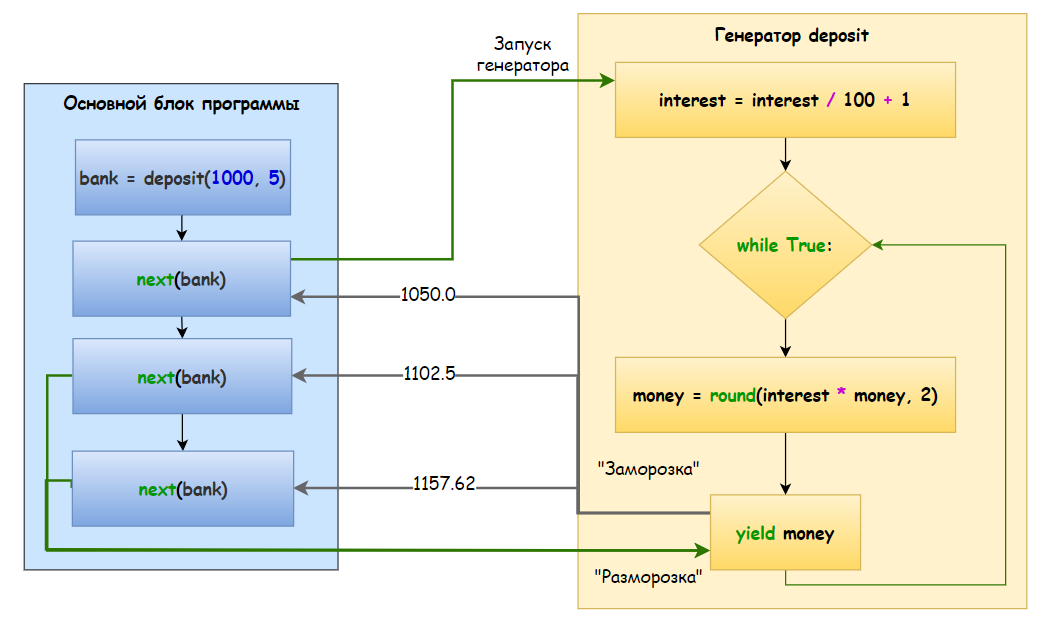

Мы создали объект-генератор `bank`, вызвав функцию `deposit()`. Далее мы трижды применили к генератору функцию `next()` для того, чтобы получить следующий элемент из генератора.

*   Первый вызов `next()`: тело функции выполняется — рассчитывается переменная  `interest`. После этого начинается первая итерация цикла `while` внутри функции `deposit()`; оператор `yield` вернул значение локальной переменной `money (round(1000*1.05, 2) = 1050)` из функции в основной блок кода. При этом сама функция `deposit()` не прекратила свою работу, а просто была «заморожена» до следующего вызова `next()`.
*   Второй вызов `next():` выполнилась вторая итерация цикла `while`, и оператор `yield` вернул обновлённое значение `money (round(1050*1.05, 2) = 1102.5)` из функции в основной блок кода. Работа функции вновь была «заморожена», но не прекращена. Ждём следующего вызова `next()`.
Третий вызов `next()`: цикл `while` повторяется в третий раз, и оператор `yield` возвращает новое значение переменной money `(round(1102.5* 1.05, 2) = 1157.62)` из функции. Снова переходим в режим ожидания следующего вызова `next()`.
Мы разработали функцию-генератор, с помощью которой можно получать значения суммы вклада, если его срок является бесконечным. Наш генератор работает на цикле `while` без условия выхода, поэтому может возвращать объекты бесконечно много раз.

Давайте добавим генератор вклада, который автоматически закрывается через заданное число лет. Для этого объявим функцию `deposit_years()` с тремя аргументами: `money` — начальная сумма на счёте, `interest` — процент по вкладу и `years` — срок вклада (в годах). В отличие от прошлой функции, мы будем обновлять значение `money` не в бесконечном цикле, а в цикле `for` по диапазону от `0` до `years`. Не забудем выводить переменную `money` из функции с помощью yield, тем самым создавая генератор:

In [ ]:
# Объявляем функцию для расчёта суммы вклада
# Аргумент years принимает число лет, на которое рассчитан вклад
def deposit_years(money, interest, years):
    interest = interest/100 + 1
    # Вместо while используем цикл for с range
    for year in range(years):
        money = round(interest * money, 2)
        # Выдаём полученную сумму вклада
        yield money

Создадим новый вклад на два года на сумму `1 500` с `3%` годовых:

In [ ]:
bank2 = deposit_years(1500, 3, 2)

Попробуем теперь три раза подряд узнать сумму денег на вкладе:

In [ ]:
print(next(bank2))
print(next(bank2))
print(next(bank2))
# Будет напечатано:
# 1545.0
# 1591.35
# StopIteration:

В первые два раза были напечатаны суммы денег, а на третий раз возникла традиционная для итератора ошибка `StopIteration`. Откуда она взялась?

Дело в том, что цикл `for` в генераторе завершился после двух итераций, интерпретатор `Python` не встретил оператор `yield`, на котором можно было бы заморозить выполнение генератора, и окончательно прекратил работу генератора. 

Генераторы — это специальный вид итераторов. Это значит, что генераторы можно обрабатывать в цикле `for`.

Давайте положим в наш банк `10000` с `10 %` ставкой на `3` года. Затем выведем суммы вклада на каждый год на экран:

In [ ]:
bank3 = deposit_years(10000, 10, 3)
for money in bank3:
    print(money)
# Будет напечатано:
# 11000.0
# 12100.0
# 13310.0

Напомним, что на каждой итерации цикл `for` невидимо для нас вызывает функцию `next()`, чтобы получить следующий элемент из итератора (в нашем примере правильнее сказать генератора). Когда возникает ошибка `StopIteration`, цикл `for` её отлавливает и прекращает итерации.

Иногда нам хочется получить сразу все сгенерированные значения и поместить их в список, кортеж или ещё куда-либо.  

Все значения, которые генерирует функция `deposit_years()`, можно завернуть в список, просто обернув результат её работы в функцию `list()`:

In [ ]:
bank3 = deposit_years(10000, 10, 3)
sums = list(bank3)
print(sums)
# Будет напечатано:
# [11000.0, 12100.0, 13310.0]

Когда мы обернули генератор в функцию `list()`, мы заставили его выдать нам все свои значения и занесли их в список.

А вот с бесконечными генераторами так лучше не делать — возникнет бесконечный цикл, поскольку генератор не сможет остановить своё выполнение. ⛔ Код ниже не нужно запускать!

    bank3 = deposit(10000, 10)
 
    sums = list(bank3)
    print(sums)
    # Возникнет бесконечный цикл! Не запускать!

Генератор — это «ленивый» итератор. Отличие от обычного итератора состоит в том, что обычный итератор хранит все свои элементы в памяти, а генератор — нет. При создании генератор не выполняет код внутри себя (внутри функции). Он хранит в памяти только последний вычисленный элемент и правило перехода к следующему.

Вычисление следующего значения происходит лишь при выполнении метода `next()`. Предыдущее значение при этом теряется. Например, в наших примерах мы генерировали бесконечную и конечную последовательность, управляя значением только одной переменной — `money`. Мы не сохраняли предыдущие значения нашего депозита — только выдавали текущее.

Таким образом, мы получаем экономию расходуемой памяти. Это главное преимущество генераторов при работе с большим объёмом данных.

Если проводить аналогию, то итераторы — это магазин готовой еды, где хранятся все блюда из меню и продавец просто выдаёт их вам с витрины. Генераторы — это рестораны, которые готовят блюдо только по заказу. Как только блюдо было приготовлено, оно выдаётся клиенту, и повар ждёт следующего заказа.

In [ ]:
def mygen():
    i=2
    a=input()
    print('hello')
    while i>0:
        i-=1
        yield i

gen = mygen()
print(0)
for s in gen:
    print(s, end=", ")

# непонятно! почему ввод и вывод в генераторе производится только после 
# прохода по всем элементам    

0
123456
hello
1, 0, 

# СОКРАЩЁННАЯ ЗАПИСЬ ГЕНЕРАТОРОВ

Ранее мы научились создавать генераторы в длинном виде. Синтаксис по их созданию очень похож на синтаксис для функций. Однако в Python существует способ для создания простых генераторов в одну строку.

Давайте рассмотрим пример.

Представим ситуацию, мы забыли таблицу квадратов чисел и, чтобы её вспомнить, мы хотим сгенерировать квадраты натуральных чисел от 1 до 10. Напишем для этого генератор `square_gen`:

In [ ]:
# Объявляем генератор square_gen
def square_gen():
    # Создаём цикл для последовательности от 1 до 10
    for x in range(1, 11):
        # Выдаём квадрат числа
        yield x ** 2
gen = square_gen()
print(type(gen))
# Будет выведено:
# <class 'generator'>

Отлично, генератор создан. Можно даже обернуть сгенерированные числа в список:

In [ ]:
square_list = list(gen)
print(square_list)
# Будет выведено
# [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

Но не кажется ли вам, что для такой простой задачи мы написали слишком много кода? Оказывается, можно решить её одной строкой кода с помощью сокращённой формы генератора.

Для сокращённой формы генератора используются круглые скобки. В них указывается элемент, который должен быть возвращён из генератора с помощью yield, а затем записывается цикл.

Ниже представлена схема перехода от общей формы генератора к сокращённой:

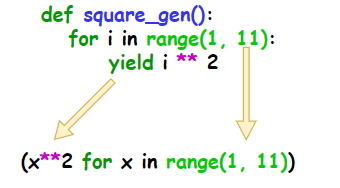

Например, сгенерируем последовательность из квадратов чисел от 1 до 10. Результат занесём в переменную `squares_generator` и убедимся, что тип данных `squares_generator` — это `generator`:

In [ ]:
# Создаём сокращённую форму генератора квадратов
squares_generator = (x**2 for x in range(1, 11))
print(type(squares_generator))
print(squares_generator)
# Будет напечатано:
# <class 'generator'>
# <generator object <genexpr> at 0x7fc9aeab61d0>

Как видите, объект `squares_generator` действительно является генератором, с которым можно работать точно так же, как с итераторами и генераторами. Вы можете использовать в нём функцию `next()`, чтобы последовательно получить элементы или пройтись по ним в цикле `for`. Попробуйте сделать это самостоятельно.

Можно получить список из сгенерированных элементов с помощью функции `list()`:

In [ ]:
# Создаём сокращённую форму генератора квадратов
squares_generator = (x**2 for x in range(1, 11))
# Оборачиваем сгенерированные элементы в список:
squares_list = list(squares_generator)
print(squares_list)
# Будет напечатано:
# [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

> Кстати, если после создания переменной `squares_generator` просто окружить её квадратными скобками, чуда не случится: будет просто создан список, в котором в качестве элемента будет храниться ссылка на генератор:

In [3]:
# Создаём сокращённую форму генератора квадратов
squares_generator = (x**2 for x in range(1, 11))
# Создаём список с одним элементом (генератором)
squares_list = [squares_generator]
print(squares_list)
# Будет напечатано:
# [<generator object <genexpr> at 0x7fc9aeab6bd0>]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


По аналогии с `list()` из генератора можно получить `tuple()` — кортеж и `set()` — множество:

In [ ]:
# Создаём сокращённую форму генератора квадратов
squares_generator = (x**2 for x in range(1, 11))
# Оборачиваем сгенерированные значения в кортеж
squares_tuple = tuple(squares_generator)
print(squares_tuple)
# Будет напечатано:
# (1, 4, 9, 16, 25, 36, 49, 64, 81, 100)

В однострочных генераторах можно также использовать условия. В сокращённой записи условия ставятся сразу после цикла без всяких двоеточий.

Например, посчитаем кубы первых 15 натуральных чисел, которые делятся на 3. Посмотрим на схему соответствия полного генератора и его сокращённой записи в таком случае:

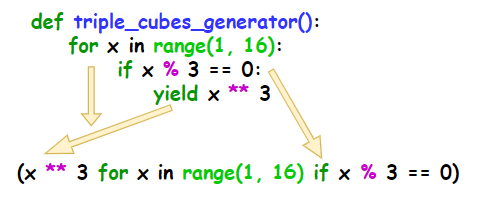

In [ ]:
# Создаём генератор кубов чисел, которые делятся на 3
triple_cubes_generator = (x**3 for x in range(1,16) if x % 3 == 0)
print(type(triple_cubes_generator))
# Оборачиваем сгенерированные значения в список
print(list(triple_cubes_generator))
# Будет напечатано:
# <class 'generator'>
# [27, 216, 729, 1728, 3375]

> **Важное замечание**: можно генерировать списки сразу, без необходимости применения функции `list()` к объекту-генератору. Достаточно написать выражение для генератора в квадратных скобках, а не в круглых. Такая конструкция называется **генератором списка**:

In [ ]:
# Создаём генератор списка кубов чисел, которые делятся на 3
triple_cubes_list = [x**3 for x in range(1,16) if x % 3 == 0]
print(type(triple_cubes_list))
print(triple_cubes_list)
# Будет напечатано:
# <class 'list'>
# [27, 216, 729, 1728, 3375]

> То же самое работает и для множества — достаточно написать фигурные скобки вместо круглых. Такая запись будет называться **генератором множества**:

In [ ]:
# Создаём генератор множества кубов чисел, которые делятся на 3
triple_cubes_set = {x**3 for x in range(1,16) if x % 3 == 0}
print(type(triple_cubes_set))
print(triple_cubes_set)
# Будет напечатано:
# <class 'set'>
# {1728, 3375, 216, 729, 27}

> А вот кортеж так получить не выйдет, поскольку круглые скобки используются для создания генераторов. Но и эту проблему можно решить — достаточно окружить выражение для генератора функцией `tuple()`. Такая запись будет называться **генератором кортежей**:

In [ ]:
triple_cubes_tuple = tuple(x**3 for x in range(1,16) if x % 3 == 0)
print(type(triple_cubes_tuple))
print(triple_cubes_tuple)
# Будет напечатано:
# <class 'tuple'>
# (27, 216, 729, 1728, 3375)